### A model to predict the Price of second-hand Bikes.

In [44]:
import pandas as pd
import numpy as np
import joblib as jb
import math

In [45]:
df = pd.read_csv('Used_Bikes.csv')

In [46]:
# Drop null values.
df.dropna(inplace=True)

In [47]:
# Drop duplicate values.
df.drop_duplicates(inplace = True)

In [48]:
#Dropping unwanted columns.
df.drop(columns=['bike_name', 'city'], inplace=True)

In [49]:
df

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...
9362,25000.0,48587.0,First Owner,8.0,150.0,Hero
9369,35000.0,60000.0,First Owner,9.0,220.0,Bajaj
9370,450000.0,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,139000.0,21300.0,First Owner,4.0,400.0,Bajaj


In [50]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [51]:
dt = {
    "First Owner":1,
    "Second Owner":2,
    "Third Owner":3,
    "Fourth Owner Or More" : 4
}
df['owner'] = df['owner'].map(dt)

In [52]:
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [53]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [54]:
# Encoding classes to numbers.
# sklearn.

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [56]:
encoder = LabelEncoder()

In [57]:
output = encoder.fit_transform(df['brand'])

In [58]:
output.__class__

numpy.ndarray

In [59]:
output

array([19, 17, 20, ...,  4,  1,  1])

In [60]:
df['brand'] = output

In [61]:
df['brand'].unique()

array([19, 17, 20, 21,  6,  5,  1, 18,  2, 11, 15, 12,  3,  7,  4, 10,  0,
        9, 16, 13, 22, 14,  8])

In [62]:
x = df.drop('price', axis=1)
y = df[['price']]

In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [64]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5859, 5), (1465, 5), (5859, 1), (1465, 1))

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression() 

In [67]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [68]:
lr.score(xtrain, ytrain) * 100

65.83186303624649

In [69]:
lr.score(xtest, ytest) * 100

71.75947383086564

In [70]:
pred = lr.predict(xtest)

In [71]:
ytest['pred'] = pred.ravel()
ytest

,price,pred
4909,88400.0,150683.502736
1942,102850.0,246408.764116
5763,67000.0,94949.236564
4800,30000.0,2790.775522
7614,20000.0,6456.787056
...,...,...
5653,395000.0,411532.041280
609,140000.0,102647.279228
4211,54500.0,37079.005236
6379,114000.0,238205.040245


### Loss Function
- MSE (mean square value)
- MAE (mean absolute value)
- RMSE (root mean square value)

## MSE

In [72]:
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(ytest['price'], ytest['pred']))

MSE:  5498068117.7325735


## MAE

In [73]:
from sklearn .metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(ytest['price'], ytest['pred']))

MAE:  37787.34371410068


## RMSE

In [74]:
from sklearn .metrics import root_mean_squared_error
print('RMSE: ', root_mean_squared_error(ytest['price'], ytest['pred']))

RMSE:  74148.95897942582


## HUBER LOSS
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

In [79]:
ytest['pred'] = (ytest['pred'] > 0.5).astype(int)
ytest['price'] = (ytest['price'] > 0.5).astype(int)

In [80]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score
print("Confusion Matrix: ", confusion_matrix(ytest['price'], ytest['pred']))
print("Precision score: ", precision_score(ytest['price'], ytest['pred']))
print("F1 Score ", f1_score(ytest['price'], ytest['pred']))
print("Accuracy Score ", accuracy_score(ytest['price'], ytest['pred']))
print("Recall Score ", recall_score(ytest['price'], ytest['pred']))


Confusion Matrix:  [[   0    0]
 [  89 1376]]
Precision score:  1.0
F1 Score  0.9686730024639212
Accuracy Score  0.9392491467576792
Recall Score  0.9392491467576792


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(ytest['price'], ytest['pred'])
cm

array([[   0,    0],
       [  89, 1376]], dtype=int64)

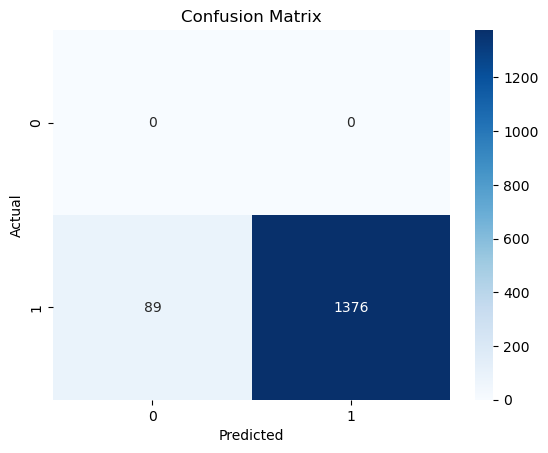

In [83]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()